In [83]:
#Dependencies
from config import FBI_api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import csv
import json
import datetime



Minneapolis Neighborhood crime stats and descriptions

In [84]:
#load the crime data csv
file = "../Resources/NEIGHBORHOOD_CRIME_STATS.csv"
crime_stats = pd.read_csv(file)
crime_stats.head()

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
1,2,** NOT ASSIGNED **,Arson,0.0,8,2017
2,3,** NOT ASSIGNED **,Auto Theft,3.0,8,2017
3,4,** NOT ASSIGNED **,Burglary,1.0,8,2017
4,5,** NOT ASSIGNED **,Homicide,0.0,8,2017


In [127]:
# Getting a list of crime types for Minneapolis
crime_stats.groupby(['ucrDescription', 'reportYear']).sum()
# crime_desc = ['Aggravated Assault', 'Arson', 'Auto Theft', 'Burglary', 'Homicide', 'Larceny', 'Rape', 'Robbery']
# violent = ['Aggravated Assault', 'Homicide', 'Rape', 'Robbery']
# non_violent = ['Arson', 'Auto Theft', 'Burglary', 'Larceny']

neighborhoodCrimeStatisticsID   number  \
ucrDescription     reportYear                                           
Aggravated Assault 2017                               773080    887.0   
                   2018                              8174496   1797.0   
                   2019                             17095584   1963.0   
                   2020                             26016672   2357.0   
                   2021                              7898088    411.0   
Arson              2017                               773520     52.0   
                   2018                              8175552     71.0   
                   2019                             17096640     70.0   
                   2020                             26017728    113.0   
                   2021                              7898352     18.0   
Auto Theft         2017                               773960    982.0   
                   2018                              8176608   2219.0   
                   2019                             17097696   2878.0   
                   2020                             26018784   3930.0   
                   2021                              7898616   1007.0   
Burglary           2017                               774400   1715.0   
                   2018                              8177664   3059.0   
                   2019                             17098752   3329.0   
                   2020                             26019840   3932.0   
                   2021                              7898880    514.0   
Homicide           2017                               774840     16.0   
                   2018                              8178720     30.0   
                   2019                             17099808     43.0   
                   2020                             26020896     74.0   
                   2021                              7899144     16.0   
Larceny            2017                               775280   5558.0   
                   2018                              8179776  11513.0   
                   2019                             17100864  13037.0   
                   2020                             26021952  11697.0   
                   2021                              7899408   2115.0   
Rape               2017                               775720    206.0   
                   2018                              8180832    455.0   
                   2019                             17101920    474.0   
                   2020                             26023008    385.0   
                   2021                              7899672    103.0   
Robbery            2017                               776160    724.0   
                   2018                              8181888   1188.0   
                   2019                             17102976   1305.0   
                   2020                             26024064   1732.0   
                   2021                              7899936    363.0   

                               reportMonth  
ucrDescription     reportYear               
Aggravated Assault 2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   2021                528  
Arson              2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   2021                528  
Auto Theft         2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   2021                528  
Burglary           2017               4400  
                   2018               6864  
                   2019               6864  
                   2020               6864  
                   

Weather Data Cleanup and Analysis

In [162]:
#load the weather data csv
file = "../Resources/weather_data_full.csv"
weather_data = pd.read_csv(file)
weather_data.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,1,2008-07-01,29,83,16,61,23,73,0.0,0.00,...,21,23,74,6,05:31 AM,09:03 PM,03:25 AM,08:17 PM,Waning Gibbous,89.7
1,1,2008-07-02,25,76,18,65,22,72,1.2,0.05,...,24,23,74,6,05:31 AM,09:03 PM,04:31 AM,09:15 PM,Waning Gibbous,82.8
2,1,2008-07-03,25,77,13,55,19,65,0.0,0.00,...,9,18,65,5,05:32 AM,09:03 PM,05:49 AM,09:58 PM,Waning Gibbous,75.9
3,1,2008-07-04,27,80,15,60,21,70,0.0,0.00,...,11,21,70,6,05:33 AM,09:03 PM,07:12 AM,10:30 PM,Last Quarter,69.0
4,1,2008-07-05,28,82,18,64,22,72,0.0,0.00,...,25,23,74,6,05:33 AM,09:02 PM,08:33 AM,10:56 PM,Last Quarter,62.1


In [163]:
# Simplify the weather dataframe
weather_df = weather_data[['date', 'maxtempF', 'mintempF', 'totalprecipIn', 'windspeedMiles', 'humidity', 'FeelsLikeF']]
weather_df.head()

,date,maxtempF,mintempF,totalprecipIn,windspeedMiles,humidity,FeelsLikeF
0,2008-07-01,83,61,0.00,8,62,74
1,2008-07-02,76,65,0.05,10,62,74
2,2008-07-03,77,55,0.00,4,67,65
3,2008-07-04,80,60,0.00,4,66,70
4,2008-07-05,82,64,0.00,10,65,74


In [164]:
#splitting the date column into year, month and day to do proper grouping
new = weather_df["date"].str.split("-", n = 2, expand = True)
weather_df["year"]= new[0]
weather_df["month"]= new[1]
weather_df["day"]= new[2]  
weather_df.head()

<ipython-input-164-e8a626452c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["year"]= new[0]
<ipython-input-164-e8a626452c85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["month"]= new[1]
<ipython-input-164-e8a626452c85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,date,maxtempF,mintempF,totalprecipIn,windspeedMiles,humidity,FeelsLikeF,year,month,day
0,2008-07-01,83,61,0.00,8,62,74,2008,07,01
1,2008-07-02,76,65,0.05,10,62,74,2008,07,02
2,2008-07-03,77,55,0.00,4,67,65,2008,07,03
3,2008-07-04,80,60,0.00,4,66,70,2008,07,04
4,2008-07-05,82,64,0.00,10,65,74,2008,07,05


In [165]:
# filtering the weather data to the desired date range
weather_df = weather_df.loc[(weather_df["date"] >= '2016-01-01') & (weather_df["date"] <= '2019-12-31')]
weather_df.head

<bound method NDFrame.head of             date  maxtempF  mintempF  totalprecipIn  windspeedMiles  humidity  \
2740  2016-01-01        25        15           0.00              11        91   
2741  2016-01-02        26        13           0.00              10        91   
2742  2016-01-03        26        16           0.00              10        91   
2743  2016-01-04        12         5           0.00               9        91   
2744  2016-01-05        26        19           0.00              14        90   
...          ...       ...       ...            ...             ...       ...   
4196  2019-12-27        26        20           0.00               7        92   
4197  2019-12-28        34        24           0.21               8        92   
4198  2019-12-29        38        33           0.12               9        98   
4199  2019-12-30        31        20           0.23               8        95   
4200  2019-12-31        20        12           0.01              11        90  

In [166]:
# filtering the weather data by year
weather_2016 = weather_df.loc[(weather_df["date"] >= '2016-01-01') & (weather_df["date"] <= '2016-12-31')]
weather_2017 = weather_df.loc[(weather_df["date"] >= '2017-01-01') & (weather_df["date"] <= '2017-12-31')]
weather_2018 = weather_df.loc[(weather_df["date"] >= '2018-01-01') & (weather_df["date"] <= '2018-12-31')]
weather_2019 = weather_df.loc[(weather_df["date"] >= '2019-01-01') & (weather_df["date"] <= '2019-12-31')]


In [167]:
# grabbing yearly stats for average high, average low, max high and max low temperatures for comparison
max_av_2016 = weather_2016['maxtempF'].mean()
max_av_2017 = weather_2017['maxtempF'].mean()
max_av_2018 = weather_2018['maxtempF'].mean()
max_av_2019 = weather_2019['maxtempF'].mean()
print(F'{max_av_2016}, {max_av_2017}, {max_av_2018}, {max_av_2019}')
min_av_2016 = weather_2016['mintempF'].mean()
min_av_2017 = weather_2017['mintempF'].mean()
min_av_2018 = weather_2018['mintempF'].mean()
min_av_2019 = weather_2019['mintempF'].mean()
print(F'{min_av_2016}, {min_av_2017}, {min_av_2018}, {min_av_2019}')
max_high_2016 = weather_2016['maxtempF'].max()
max_high_2017 = weather_2017['maxtempF'].max()
max_high_2018 = weather_2018['maxtempF'].max()
max_high_2019 = weather_2019['maxtempF'].max()
print(F'{max_high_2016}, {max_high_2017}, {max_high_2018}, {max_high_2019}')
max_low_2016 = weather_2016['mintempF'].min()
max_low_2017 = weather_2017['mintempF'].min()
max_low_2018 = weather_2018['mintempF'].min()
max_low_2019 = weather_2019['mintempF'].min()
print(F'{max_low_2016}, {max_low_2017}, {max_low_2018}, {max_low_2019}')

54.66120218579235, 54.5013698630137, 52.893150684931506, 51.11780821917808
40.2896174863388, 40.441095890410956, 39.1945205479452, 37.49589041095891
89, 94, 100, 92
-20, -14, -12, -27


In [168]:
# grouping weather data by year and month in the data frame and calculating average monthly temperatures for plotting
weather_group = weather_df.groupby(['year', 'month']).mean()
weather_group = pd.DataFrame(weather_group)
weather_group

maxtempF   mintempF  totalprecipIn  windspeedMiles   humidity  \
year month                                                                   
2016 01     20.774194   8.451613       0.015806        8.516129  92.935484   
     02     28.206897  17.275862       0.034828       10.344828  87.068966   
     03     47.064516  34.451613       0.060000        9.870968  71.451613   
     04     50.500000  35.933333       0.065667       11.433333  68.900000   
     05     67.225806  50.483871       0.076129        8.709677  66.580645   
     06     76.666667  59.700000       0.117000        8.333333  78.166667   
     07     78.838710  61.935484       0.112581        7.516129  78.161290   
     08     80.225806  62.612903       0.100968        6.774194  76.580645   
     09     72.466667  55.366667       0.135667        9.066667  76.300000   
     10     59.483871  44.580645       0.052581        9.096774  73.645161   
     11     49.600000  37.300000       0.055333        8.466667  76.666667   
     12     24.161290  14.774194       0.040645       10.838710  88.000000   
2017 01     23.838710  13.612903       0.043548        7.967742  93.258065   
     02     36.000000  23.357143       0.023214        9.714286  80.500000   
     03     39.709677  27.096774       0.035161       10.129032  68.709677   
     04     56.800000  41.000000       0.098333        8.866667  71.966667   
     05     63.838710  47.419355       0.163548        8.741935  75.419355   
     06     77.000000  58.533333       0.134333        8.266667  73.633333   
     07     82.483871  64.290323       0.140000        6.419355  74.129032   
     08     76.096774  60.580645       0.117419        6.677419  69.967742   
     09     75.900000  58.866667       0.086333        8.400000  64.633333   
     10     58.193548  46.354839       0.089677        9.258065  62.677419   
     11     40.266667  28.933333       0.014667        8.266667  65.033333   
     12     23.129032  14.419355       0.020000        7.354839  80.483871   
2018 01     21.387097   9.129032       0.046774        7.580645  88.096774   
     02     20.857143   7.535714       0.034286        7.142857  88.392857   
     03     36.322581  24.838710       0.029677        7.387097  81.258065   
     04     44.800000  28.166667       0.068333        7.666667  75.266667   
     05     76.903226  58.516129       0.086452        6.451613  61.419355   
     06     79.600000  64.766667       0.401333        7.700000  72.000000   
     07     83.516129  67.032258       0.077419        6.645161  67.032258   
     08     82.741935  65.483871       0.153226        6.419355  68.935484   
     09     72.133333  58.133333       0.103333        7.866667  69.400000   
     10     52.290323  39.838710       0.085161        8.354839  68.709677   
     11     32.600000  23.833333       0.031333        7.733333  70.900000   
     12     29.032258  20.580645       0.044839        6.677419  84.096774   
2019 01     18.225806   7.096774       0.017097        7.580645  78.903226   
     02     19.535714   3.214286       0.068571        7.357143  92.035714   
     03     34.838710  20.419355       0.041613        7.903226  80.741935   
     04     53.866667  39.133333       0.107333        8.633333  66.433333   
     05     64.645161  47.419355       0.133226        8.548387  67.193548   
     06     76.600000  61.566667       0.142000        7.433333  69.966667   
     07     81.709677  67.290323       0.142903        7.322581  72.645161   
     08     76.612903  62.483871       0.097419        7.322581  70.483871   
     09     73.100000  58.966667       0.119333        9.333333  73.866667   
     10     51.774194  41.032258       0.077097       10.322581  66.032258   
     11     34.966667  26.366667       0.056667        8.133333  72.733333   
     12     25.580645  12.806452       0.035806        6.741935  92.741935   

            FeelsLikeF  
year month              
2016 01       3.290323  
     02      12.137931  
     03     

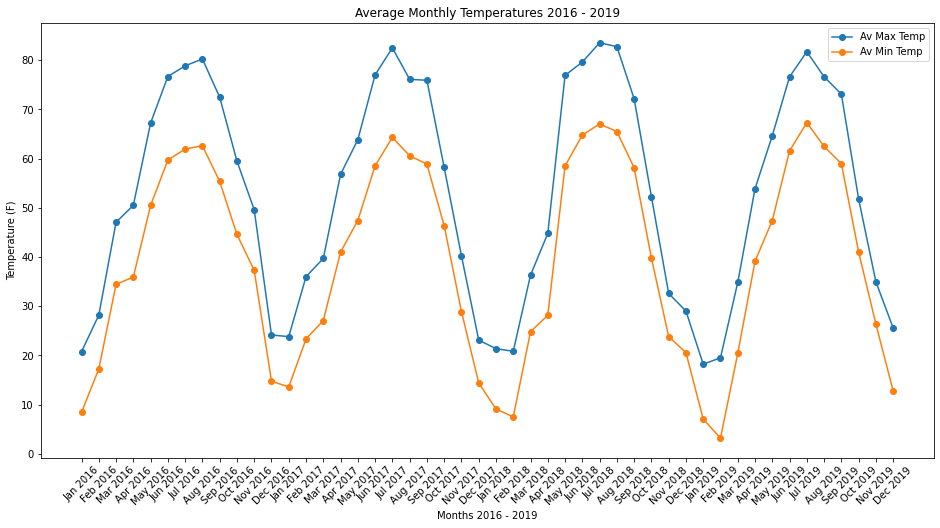

In [169]:
# Plotting the monthly average highs and lows

# Listing the labels for the x axis
labels = ['Jan 2016', 'Feb 2016', 'Mar 2016','Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016',
          'Jan 2017', 'Feb 2017', 'Mar 2017','Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017',
          'Jan 2018', 'Feb 2018', 'Mar 2018','Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',
          'Jan 2019', 'Feb 2019', 'Mar 2019','Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019',
          ]

plt.figure(figsize=(16, 8))
plt.xlabel('Months 2016 - 2019')
plt.ylabel('Temperature (F)')
plt.title('Average Monthly Temperatures 2016 - 2019')
plt.xticks(rotation = 45)
plt.plot(labels, weather_group['maxtempF'], marker ='o', label='Av Max Temp')
plt.plot(labels, weather_group['mintempF'], marker ='o', label='Av Min Temp')
plt.legend()
plt.show()

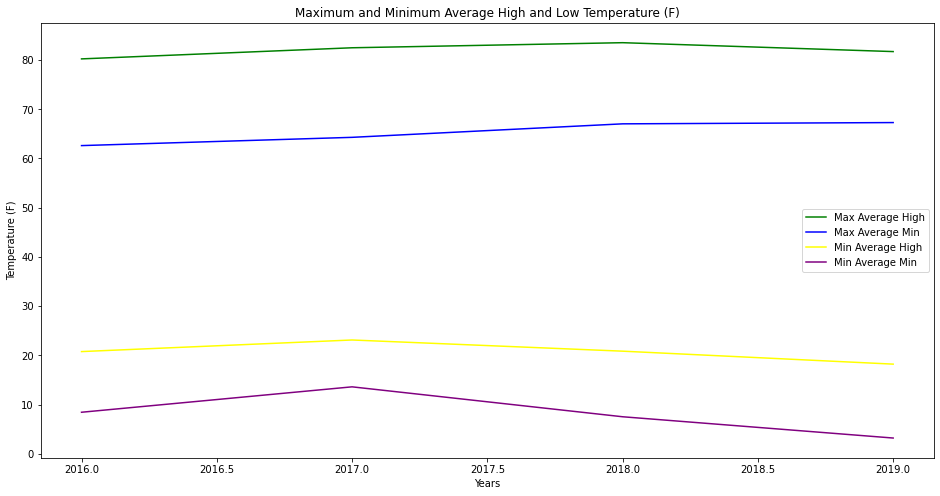

In [172]:
# Grabbing the maximum monthly average high and monthly average low for each year. 
monthly_max_2016 = weather_2016.groupby('month').mean()
monthly_max_2017 = weather_2017.groupby('month').mean()
monthly_max_2018 = weather_2018.groupby('month').mean()
monthly_max_2019 = weather_2019.groupby('month').mean()


max_temps = []
min_temps = []

max_temps.append(monthly_max_2016['maxtempF'].max())
max_temps.append(monthly_max_2017['maxtempF'].max())
max_temps.append(monthly_max_2018['maxtempF'].max())
max_temps.append(monthly_max_2019['maxtempF'].max())

min_temps.append(monthly_max_2016['mintempF'].max())
min_temps.append(monthly_max_2017['mintempF'].max())
min_temps.append(monthly_max_2018['mintempF'].max())
min_temps.append(monthly_max_2019['mintempF'].max())

min_high = []
min_low = []

min_high.append(monthly_max_2016['maxtempF'].min())
min_high.append(monthly_max_2017['maxtempF'].min())
min_high.append(monthly_max_2018['maxtempF'].min())
min_high.append(monthly_max_2019['maxtempF'].min())

min_low.append(monthly_max_2016['mintempF'].min())
min_low.append(monthly_max_2017['mintempF'].min())
min_low.append(monthly_max_2018['mintempF'].min())
min_low.append(monthly_max_2019['mintempF'].min())


#plotting the min and max average high and low by year
years = [2016,2017,2018,2019]
plt.figure(figsize=(16, 8))
plt.plot(years, max_temps, color="green", label="Max Average High")
plt.plot(years, min_temps, color="blue", label="Max Average Min")
plt.plot(years, min_high, color="yellow", label="Min Average High")
plt.plot(years, min_low, color="purple", label="Min Average Min")
plt.legend(loc="best")
plt.title("Maximum and Minimum Average High and Low Temperature (F)")
plt.xlabel("Years")
plt.ylabel("Temperature (F)")
plt.savefig('Maximum and Minimum Average High and Low Temperature (F).png')
plt.show()

Non-Violent Crime Stats by Demographic via FBI API calls

In [19]:
# grabbing stats for vehicle theft by gender
vehicle_theft_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/motor-vehicle-theft/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
vehicle_data = response.json()
vehicle_theft_stats.append(vehicle_data)
vehicle_theft_stats

     

[{'results': [{'male_count': 14,
    'female_count': 3,
    'unknown': 0,
    'data_year': 2016},
   {'male_count': 74, 'female_count': 31, 'unknown': 4, 'data_year': 2017},
   {'male_count': 218, 'female_count': 68, 'unknown': 6, 'data_year': 2018},
   {'male_count': 1433,
    'female_count': 425,
    'unknown': 2372,
    'data_year': 2019}],
  'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}]

In [42]:
# converting API JSON results to dataframe
vtheft_data = {}
vtheft_data = vehicle_theft_stats[0]
vtheft_dict = vtheft_data.get("results")
vtheft_df = pd.DataFrame(vtheft_dict)
vtheft_df['description'] = 'Vehicle Theft'
vtheft_df

,male_count,female_count,unknown,data_year,description
0,14,3,0,2016,Vehicle Theft
1,74,31,4,2017,Vehicle Theft
2,218,68,6,2018,Vehicle Theft
3,1433,425,2372,2019,Vehicle Theft


In [121]:
# grabbing stats for larceny by gender
larceny_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/larceny-theft-offenses/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
larceny_data = response.json()
larceny_stats.append(larceny_data)


In [41]:
# converting API JSON results to dataframe
larceny_data = {}
larceny_data = larceny_stats[0]
larceny_dict = larceny_data.get('results')
larceny_df = pd.DataFrame(larceny_dict)
larceny_df['description'] = 'Larceny'
larceny_df

,male_count,female_count,unknown,data_year,description
0,39,19,1,2016,Larceny
1,203,103,7,2017,Larceny
2,603,306,25,2018,Larceny
3,3551,1540,4688,2019,Larceny
4,0,0,0,2016,Larceny
5,5,2,0,2017,Larceny
6,7,7,0,2018,Larceny
7,54,31,15,2019,Larceny
8,0,4,0,2017,Larceny
9,9,12,1,2018,Larceny


In [57]:
# cleaning up and condensing the larceny stats dataframe
larceny_df = larceny_df.groupby('data_year').sum()
larceny_df['description'] = 'Larceny'
larceny_df = larceny_df.reset_index()
larceny_df = larceny_df[['male_count', 'female_count', 'unknown', 'data_year', 'description']]
larceny_df = pd.DataFrame(larceny_df)
larceny_df

,male_count,female_count,unknown,data_year,description
0,207,80,1,2016,Larceny
1,645,392,25,2017,Larceny
2,2076,1446,60,2018,Larceny
3,8657,4790,9625,2019,Larceny


In [35]:
# grabbing stats for burglary by gender
burglary_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/burglary-breaking-and-entering/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
burglary_data = response.json()
burglary_stats.append(burglary_data)
burglary_stats

[{'results': [{'male_count': 26,
    'female_count': 5,
    'unknown': 0,
    'data_year': 2016},
   {'male_count': 167, 'female_count': 40, 'unknown': 13, 'data_year': 2017},
   {'male_count': 557, 'female_count': 169, 'unknown': 24, 'data_year': 2018},
   {'male_count': 2075,
    'female_count': 403,
    'unknown': 2666,
    'data_year': 2019}],
  'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}]

In [36]:
# converting API JSON results to dataframe
burglary_data = {}
burglary_data = burglary_stats[0]
burglary_dict = burglary_data.get("results")
burglary_df = pd.DataFrame(burglary_dict)
burglary_df

,male_count,female_count,unknown,data_year
0,26,5,0,2016
1,167,40,13,2017
2,557,169,24,2018
3,2075,403,2666,2019


In [37]:
# grabbing stats for arson by gender
arson_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/arson/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
arson_data = response.json()
arson_stats.append(arson_data)
arson_stats

[{'results': [{'male_count': 7,
    'female_count': 0,
    'unknown': 0,
    'data_year': 2017},
   {'male_count': 23, 'female_count': 9, 'unknown': 0, 'data_year': 2018},
   {'male_count': 76, 'female_count': 28, 'unknown': 5, 'data_year': 2019}],
  'pagination': {'count': 3, 'page': 0, 'pages': 1, 'per_page': 0}}]

In [38]:
# converting API JSON results to dataframe
arson_data = {}
arson_data = arson_stats[0]
arson_dict = arson_data.get("results")
arson_df = pd.DataFrame(arson_dict)
arson_df

,male_count,female_count,unknown,data_year
0,7,0,0,2017
1,23,9,0,2018
2,76,28,5,2019


In [74]:
# combining the 4 non-violent crimes dataframes and clenaing up the columns
gender_data_df = vtheft_df.merge(larceny_df, on='data_year')
gender_data_df = gender_data_df.rename(columns={"male_count_x":"male_count_vehicle_theft", "female_count_x":"female_count_vehicle_theft", "unknown_x":"unknown_vehicle_theft", "male_count_y":"male_count_larceny", "female_count_y":"female_count_larceny", "unknown_y":"unknown_larceny"})
gender_data_df = gender_data_df.drop('description_x', axis = 1)
gender_data_df = gender_data_df.drop('description_y', axis = 1)
gender_data_df = gender_data_df.merge(burglary_df, on='data_year')
gender_data_df = gender_data_df.rename(columns={"male_count":"male_count_burglary", "female_count":"female_count_burglary", "unknown":"unknown_burglary"})
gender_data_df = gender_data_df.merge(arson_df, on='data_year')
gender_data_df = gender_data_df.rename(columns={"male_count":"male_count_arson", "female_count":"female_count_arson", "unknown":"unknown_arson"})
gender_data_df = gender_data_df[['data_year', 'male_count_vehicle_theft', 'female_count_vehicle_theft', 'unknown_vehicle_theft', 'male_count_larceny', 'female_count_larceny', 'unknown_larceny', 'male_count_burglary', 'female_count_burglary', 'unknown_burglary', 'male_count_arson', 'female_count_arson', 'unknown_arson']]
gender_data_df

,data_year,male_count_vehicle_theft,female_count_vehicle_theft,unknown_vehicle_theft,male_count_larceny,female_count_larceny,unknown_larceny,male_count_burglary,female_count_burglary,unknown_burglary,male_count_arson,female_count_arson,unknown_arson
0,2017,74,31,4,645,392,25,167,40,13,7,0,0
1,2018,218,68,6,2076,1446,60,557,169,24,23,9,0
2,2019,1433,425,2372,8657,4790,9625,2075,403,2666,76,28,5


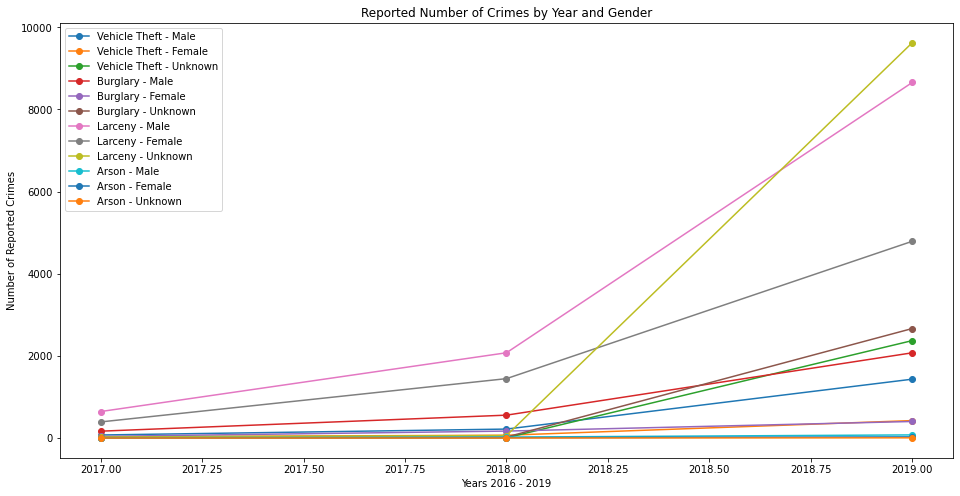

In [154]:
# Plotting the non-violent crime data by gender
plt.figure(figsize=(16, 8))
plt.xlabel('Years 2016 - 2019')
plt.ylabel('Number of Reported Crimes')
plt.title('Reported Number of Crimes by Year and Gender')
# plt.xticks(rotation = 45)
plt.plot(gender_data_df['data_year'], gender_data_df['male_count_vehicle_theft'], marker ='o', label='Vehicle Theft - Male')
plt.plot(gender_data_df['data_year'], gender_data_df['female_count_vehicle_theft'], marker ='o', label='Vehicle Theft - Female')
plt.plot(gender_data_df['data_year'], gender_data_df['unknown_vehicle_theft'], marker ='o', label='Vehicle Theft - Unknown')
plt.plot(gender_data_df['data_year'], gender_data_df['male_count_burglary'], marker ='o', label='Burglary - Male')
plt.plot(gender_data_df['data_year'], gender_data_df['female_count_burglary'], marker ='o', label='Burglary - Female')
plt.plot(gender_data_df['data_year'], gender_data_df['unknown_burglary'], marker ='o', label='Burglary - Unknown')
plt.plot(gender_data_df['data_year'], gender_data_df['male_count_larceny'], marker ='o', label='Larceny - Male')
plt.plot(gender_data_df['data_year'], gender_data_df['female_count_larceny'], marker ='o', label='Larceny - Female')
plt.plot(gender_data_df['data_year'], gender_data_df['unknown_larceny'], marker ='o', label='Larceny - Unknown')
plt.plot(gender_data_df['data_year'], gender_data_df['male_count_arson'], marker ='o', label='Arson - Male')
plt.plot(gender_data_df['data_year'], gender_data_df['female_count_arson'], marker ='o', label='Arson - Female')
plt.plot(gender_data_df['data_year'], gender_data_df['unknown_arson'], marker ='o', label='Arson - Unknown')
plt.legend()
plt.savefig('Reported Number of Crimes by Year and Gender.png')
plt.show()

In [135]:
# grabbing stats for vehicle theft by age
vehicle_theft_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/motor-vehicle-theft/offender/states/mn/age?API_KEY=" +FBI_api_key
response = requests.get(url)
vehicle_data = response.json()
vehicle_theft_stats.append(vehicle_data)
# vehicle_theft_stats



In [129]:
# converting API JSON results to dataframe
vtheft_data = {}
vtheft_data = vehicle_theft_stats[0]
vtheft_dict = vtheft_data.get("results")
vtheft_df = pd.DataFrame(vtheft_dict)
vtheft_df['description'] = 'Vehicle Theft'
vtheft_df

,unknown,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,data_year,description
0,3,0,2,6,5,1,0,0,0,0,0,2016,Vehicle Theft
1,3,0,17,43,35,7,3,1,0,0,0,2017,Vehicle Theft
2,9,0,77,85,72,31,14,3,1,0,0,2018,Vehicle Theft
3,2749,0,510,429,376,104,46,13,3,0,0,2019,Vehicle Theft


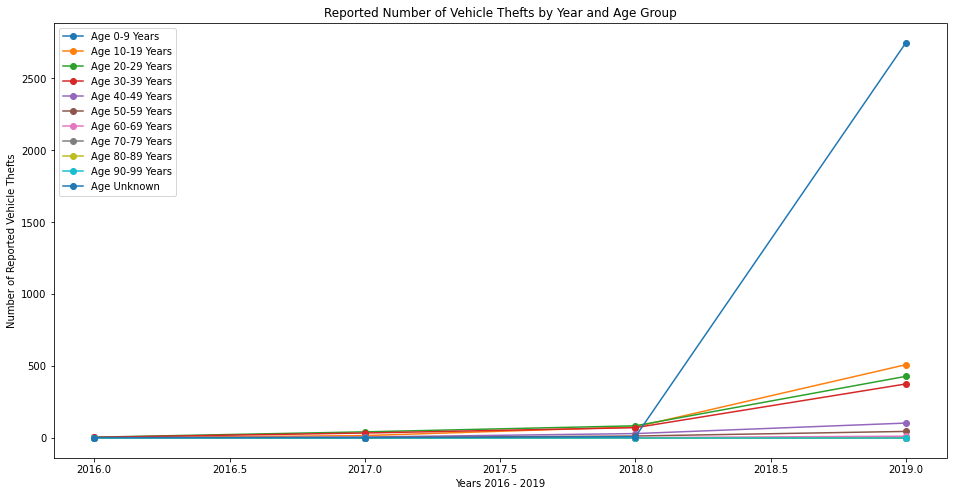

In [153]:
# Plotting vehicle theft data by age
plt.figure(figsize=(16, 8))
plt.xlabel('Years 2016 - 2019')
plt.ylabel('Number of Reported Vehicle Thefts')
plt.title('Reported Number of Vehicle Thefts by Year and Age Group')
# plt.xticks(rotation = 45)
plt.plot(vtheft_df['data_year'], vtheft_df['range_0_9'], marker ='o', label='Age 0-9 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_10_19'], marker ='o', label='Age 10-19 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_20_29'], marker ='o', label='Age 20-29 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_30_39'], marker ='o', label='Age 30-39 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_40_49'], marker ='o', label='Age 40-49 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_50_59'], marker ='o', label='Age 50-59 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_60_69'], marker ='o', label='Age 60-69 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_70_79'], marker ='o', label='Age 70-79 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_80_89'], marker ='o', label='Age 80-89 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['range_90_99'], marker ='o', label='Age 90-99 Years')
plt.plot(vtheft_df['data_year'], vtheft_df['unknown'], marker ='o', label='Age Unknown')
plt.legend()
plt.savefig('Reported Number of Vehicle Thefts by Year and Age Group.png')
plt.show()

In [139]:
# grabbing stats for larceny by gender
larceny_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/larceny-theft-offenses/offender/states/mn/age?API_KEY=" +FBI_api_key
response = requests.get(url)
larceny_data = response.json()
larceny_stats.append(larceny_data)
# larceny_stats

In [140]:
# converting API JSON results to dataframe
larceny_data = {}
larceny_data = larceny_stats[0]
larceny_dict = larceny_data.get('results')
larceny_df = pd.DataFrame(larceny_dict)
larceny_df['description'] = 'Larceny'
larceny_df

,unknown,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,data_year,description
0,5,0,16,19,9,5,3,2,0,0,0,2016,Larceny
1,14,1,53,91,73,36,28,14,2,1,0,2017,Larceny
2,47,0,152,262,268,91,72,27,13,1,1,2018,Larceny
3,5614,8,879,1202,1152,391,386,105,30,11,1,2019,Larceny
4,0,0,0,0,0,0,0,0,0,0,0,2016,Larceny
5,0,0,4,2,1,0,0,0,0,0,0,2017,Larceny
6,0,0,0,1,7,3,3,0,0,0,0,2018,Larceny
7,22,0,9,22,24,14,8,0,1,0,0,2019,Larceny
8,0,0,0,3,1,0,0,0,0,0,0,2017,Larceny
9,2,0,4,3,7,4,1,0,1,0,0,2018,Larceny


In [141]:
# cleaning up and condensing the larceny stats dataframe
larceny_df = larceny_df.groupby('data_year').sum()
larceny_df['description'] = 'Larceny'
larceny_df = larceny_df.reset_index()
larceny_df = pd.DataFrame(larceny_df)
larceny_df

,data_year,unknown,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,description
0,2016,11,0,65,127,48,23,9,5,0,0,0,Larceny
1,2017,32,2,222,323,251,117,70,42,2,1,0,Larceny
2,2018,125,5,799,989,895,410,242,82,29,4,2,Larceny
3,2019,11238,21,2618,3585,3113,1225,924,279,53,15,1,Larceny


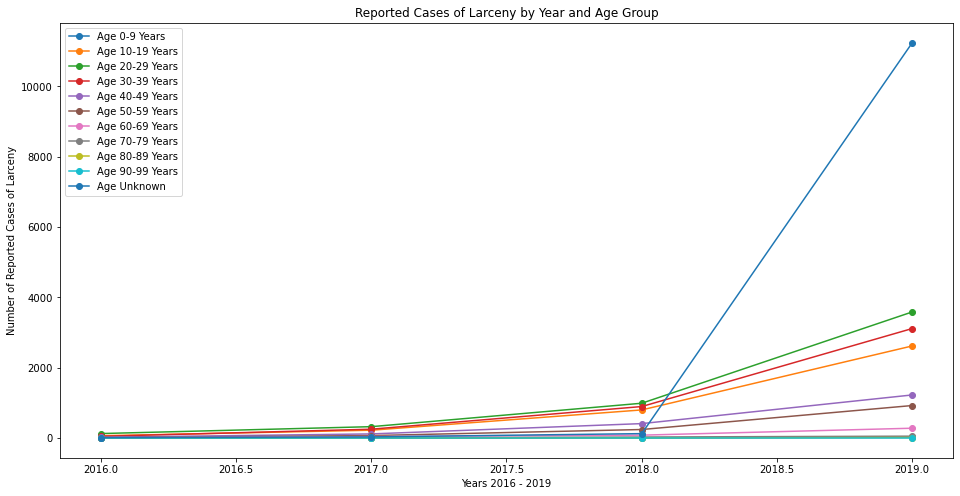

In [152]:
# Plotting larceny data by age
plt.figure(figsize=(16, 8))
plt.xlabel('Years 2016 - 2019')
plt.ylabel('Number of Reported Cases of Larceny')
plt.title('Reported Cases of Larceny by Year and Age Group')
# plt.xticks(rotation = 45)
plt.plot(larceny_df['data_year'], larceny_df['range_0_9'], marker ='o', label='Age 0-9 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_10_19'], marker ='o', label='Age 10-19 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_20_29'], marker ='o', label='Age 20-29 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_30_39'], marker ='o', label='Age 30-39 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_40_49'], marker ='o', label='Age 40-49 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_50_59'], marker ='o', label='Age 50-59 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_60_69'], marker ='o', label='Age 60-69 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_70_79'], marker ='o', label='Age 70-79 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_80_89'], marker ='o', label='Age 80-89 Years')
plt.plot(larceny_df['data_year'], larceny_df['range_90_99'], marker ='o', label='Age 90-99 Years')
plt.plot(larceny_df['data_year'], larceny_df['unknown'], marker ='o', label='Age Unknown')
plt.legend()
plt.savefig('Reported Cases of Larceny by Year and Age Group.png')
plt.show()

In [144]:
# grabbing stats for burglary by age
burglary_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/burglary-breaking-and-entering/offender/states/mn/age?API_KEY=" +FBI_api_key
response = requests.get(url)
burglary_data = response.json()
burglary_stats.append(burglary_data)
# burglary_stats

In [145]:
# converting API JSON results to dataframe
burglary_data = {}
burglary_data = burglary_stats[0]
burglary_dict = burglary_data.get("results")
burglary_df = pd.DataFrame(burglary_dict)
burglary_df

,unknown,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,data_year
0,4,0,5,13,4,3,2,0,0,0,0,2016
1,10,1,66,70,42,23,6,2,0,0,0,2017
2,25,1,185,260,164,66,38,9,2,0,0,2018
3,3072,4,381,710,631,198,110,31,6,1,0,2019


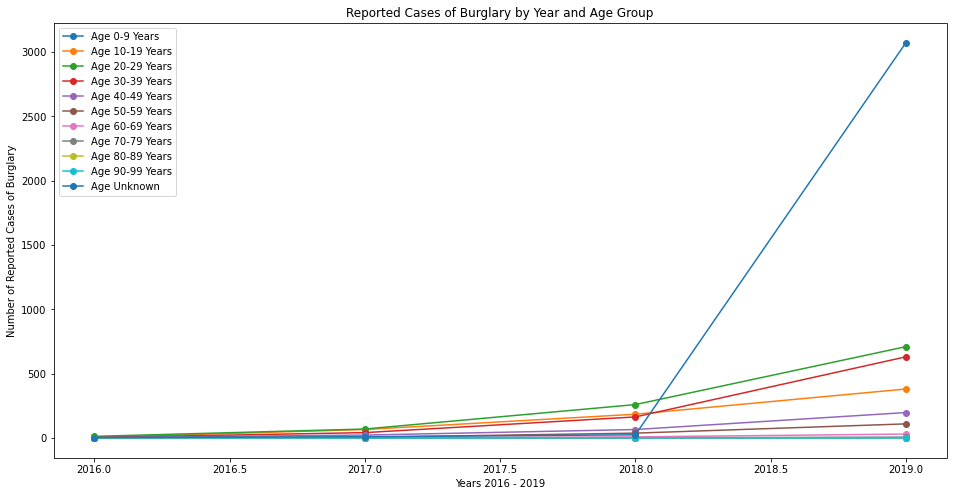

In [151]:
# Plotting burglary data by age
plt.figure(figsize=(16, 8))
plt.xlabel('Years 2016 - 2019')
plt.ylabel('Number of Reported Cases of Burglary')
plt.title('Reported Cases of Burglary by Year and Age Group')
plt.plot(burglary_df['data_year'], burglary_df['range_0_9'], marker ='o', label='Age 0-9 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_10_19'], marker ='o', label='Age 10-19 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_20_29'], marker ='o', label='Age 20-29 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_30_39'], marker ='o', label='Age 30-39 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_40_49'], marker ='o', label='Age 40-49 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_50_59'], marker ='o', label='Age 50-59 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_60_69'], marker ='o', label='Age 60-69 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_70_79'], marker ='o', label='Age 70-79 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_80_89'], marker ='o', label='Age 80-89 Years')
plt.plot(burglary_df['data_year'], burglary_df['range_90_99'], marker ='o', label='Age 90-99 Years')
plt.plot(burglary_df['data_year'], burglary_df['unknown'], marker ='o', label='Age Unknown')
plt.legend()
plt.savefig('Reported Cases of Burglary by Year and Age Group.png')
plt.show()

In [146]:
# grabbing stats for arson by age
arson_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/arson/offender/states/mn/age?API_KEY=" +FBI_api_key
response = requests.get(url)
arson_data = response.json()
arson_stats.append(arson_data)
# arson_stats

In [147]:
# converting API JSON results to dataframe
arson_data = {}
arson_data = arson_stats[0]
arson_dict = arson_data.get("results")
arson_df = pd.DataFrame(arson_dict)
arson_df

,unknown,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,data_year
0,0,0,4,0,2,0,1,0,0,0,0,2017
1,0,0,11,11,6,1,2,0,1,0,0,2018
2,11,4,28,18,24,13,8,2,1,0,0,2019


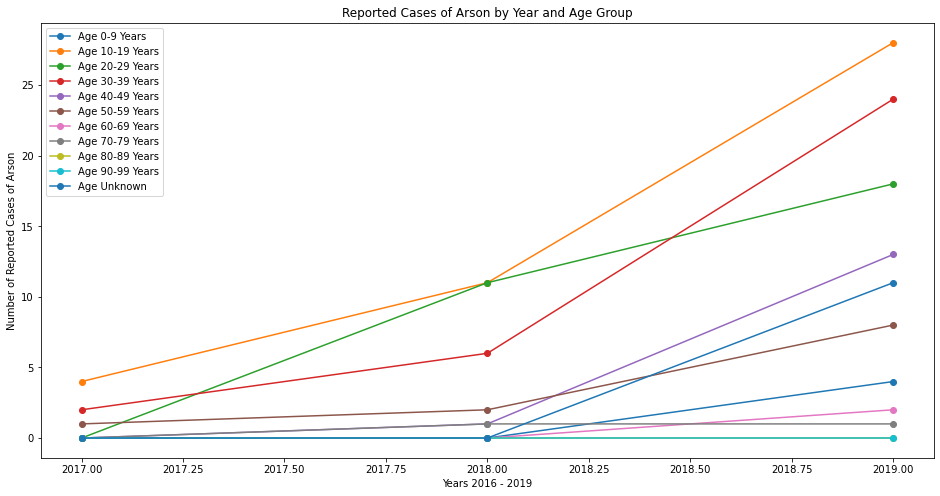

In [171]:
# Plotting arson data by age
plt.figure(figsize=(16, 8))
plt.xlabel('Years 2016 - 2019')
plt.ylabel('Number of Reported Cases of Arson')
plt.title('Reported Cases of Arson by Year and Age Group')
plt.plot(arson_df['data_year'], arson_df['range_0_9'], marker ='o', label='Age 0-9 Years')
plt.plot(arson_df['data_year'], arson_df['range_10_19'], marker ='o', label='Age 10-19 Years')
plt.plot(arson_df['data_year'], arson_df['range_20_29'], marker ='o', label='Age 20-29 Years')
plt.plot(arson_df['data_year'], arson_df['range_30_39'], marker ='o', label='Age 30-39 Years')
plt.plot(arson_df['data_year'], arson_df['range_40_49'], marker ='o', label='Age 40-49 Years')
plt.plot(arson_df['data_year'], arson_df['range_50_59'], marker ='o', label='Age 50-59 Years')
plt.plot(arson_df['data_year'], arson_df['range_60_69'], marker ='o', label='Age 60-69 Years')
plt.plot(arson_df['data_year'], arson_df['range_70_79'], marker ='o', label='Age 70-79 Years')
plt.plot(arson_df['data_year'], arson_df['range_80_89'], marker ='o', label='Age 80-89 Years')
plt.plot(arson_df['data_year'], arson_df['range_90_99'], marker ='o', label='Age 90-99 Years')
plt.plot(arson_df['data_year'], arson_df['unknown'], marker ='o', label='Age Unknown')
plt.legend()
plt.savefig('Reported Cases of Arson by Year and Age Group.png')
plt.show()